In [2]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Datasets

In [3]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df.shape

(92016, 5)

In [6]:
#check for missing values
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [7]:
# Convert to a time series object - 'FullDate' to 'DateTime'
from datetime import datetime
df['FullDate'] = pd.to_datetime(df.FullDate)

# Rename the Columns FullDate And ElecPrice
df = df.rename(columns={"FullDate" : "ds" , "ElecPrice" : "y" })
df.set_index('ds', inplace=True)
df.head()

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [8]:
df_daily = df.resample('D').sum()
df_daily

,Tmax,SysLoad,GasPrice,y
ds,,,,
2010-09-01,379.2,41565.38000,88.5600,2751.700
2010-09-02,369.6,38898.99000,88.5600,570.810
2010-09-03,439.2,41665.76000,106.8000,504.975
2010-09-04,328.8,35638.08500,81.3600,502.275
2010-09-05,357.6,35611.41000,106.8000,500.555
...,...,...,...,...
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495


In [9]:
df_daily.corr()

,Tmax,SysLoad,GasPrice,y
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
y,0.004748,0.170524,0.352420,1.000000


In [10]:
# Looking at the shape of Daily Rate
df_daily.shape

(3834, 4)

# Question 11

Resample the data from an hour sampling rate to a daily sampling rate (i.e sum over the hours for each day). Which of the following is a plot of ElecPrice over time?

Text(0, 0.5, 'ElecPrice')

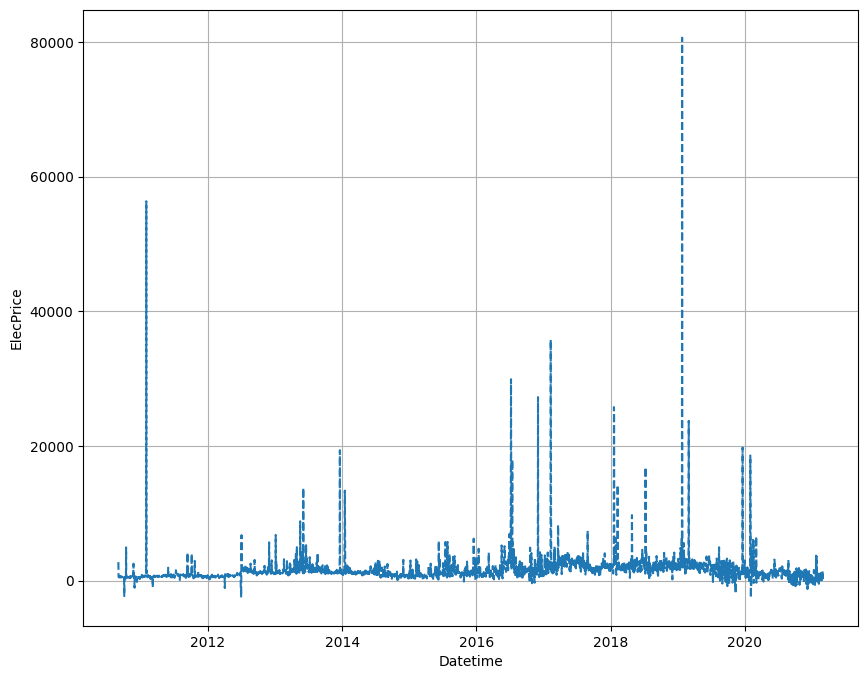

In [11]:
#plot of the daily global_active_power over time
plt.figure(figsize=(10,8))
plt.plot(df_daily.index, df_daily.y, '--')
plt.grid()
plt.xlabel('Datetime')
plt.ylabel('ElecPrice')

# Question 12

Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [12]:
#Importing the ADF library
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

sysload = adfuller(df_daily['SysLoad'])
gasprice = adfuller(df_daily['GasPrice'])
print(f'p-value of the SysLoad: {round(sysload[1],6)}')
print(f'p-value of the GasPrice: {round(gasprice[1],6)}')

p-value of the SysLoad: 0.004254
p-value of the GasPrice: 0.045027


# Question 13

Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [13]:
# Critical Values of GasPrice
gasprice = adfuller(df_daily['GasPrice'])
print(f'ADF Statistic: {round(gasprice[0],4)}')
print('Critical Values:')
for per, val in gasprice[4].items():
  print(f'   {per}: {val}')

ADF Statistic: -2.9028
Critical Values:
   1%: -3.4320693157877544
   5%: -2.8622996992165364
   10%: -2.5671743978048323


In [14]:
df_daily.reset_index(inplace=True)

In [15]:
#Split the dataset
train = df_daily.iloc[:2757,:]
test = df_daily.iloc[2757:,:]

In [16]:
train.shape

(2757, 5)

In [17]:
train.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


# Question 14

In [18]:
# Defining the MAPE function
def mape(y, yfb):
  y = y.reset_index(drop=True)
  return round(np.mean(np.abs((y - yfb)/y)*100),2)

In [19]:
import prophet

In [20]:
from prophet import Prophet
model_1 = Prophet()
model_1.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiw9e705/56fai1k4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiw9e705/3z4i3g6b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62200', 'data', 'file=/tmp/tmpeiw9e705/56fai1k4.json', 'init=/tmp/tmpeiw9e705/3z4i3g6b.json', 'output', 'file=/tmp/tmpeiw9e705/prophet_model4jawgg84/prophet_model-20230801205822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:58:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:58:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [22]:
pred1 = model_1.predict(test)
mape(test['y'],pred1['yhat'])

544.09

# Question 15 & 16

In [23]:
# Defining the RMSE function
def rmse(y, yhat):
    y = y.reset_index(drop=True)
    return round(np.sqrt(np.mean(np.square(y - yhat))),2)

In [24]:
rmse(test['y'], pred1['yhat'])

3207.46

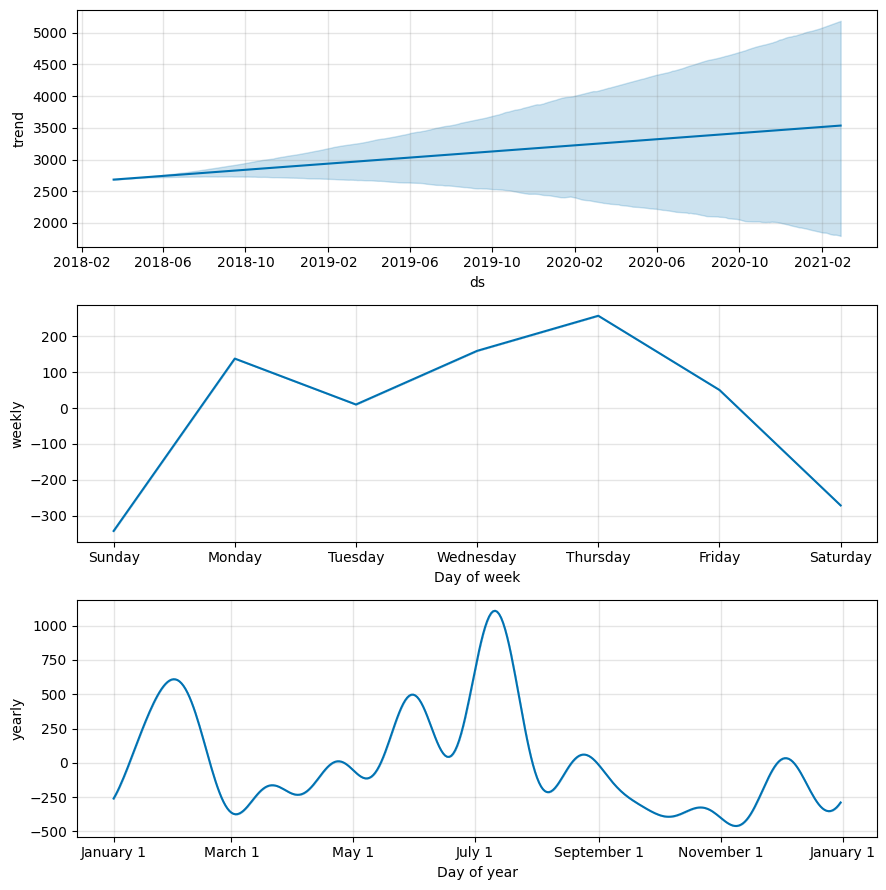

In [25]:
model_1.plot_components(pred1)
plt.show()

# Question 17

In [26]:
new_df = df_daily.rename(columns={"SysLoad" : "one" , "Tmax" : "two", "GasPrice" : "three" })
new_df.head()

,ds,two,one,three,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [28]:
# assign train and test data
train_2 = new_df[:2757]
test_2 = new_df[2757:]
print('train shape', train_2.shape)
print('test shape', test_2.shape)

train shape (2757, 5)
test shape (1077, 5)


In [29]:
#Create multivariate model
model_2 = Prophet()

model_2.add_regressor('one')
model_2.add_regressor('two')
model_2.add_regressor('three')

In [30]:
model_2.fit(train_2)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiw9e705/xa_nq2zy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiw9e705/3qzbmq6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48289', 'data', 'file=/tmp/tmpeiw9e705/xa_nq2zy.json', 'init=/tmp/tmpeiw9e705/3qzbmq6c.json', 'output', 'file=/tmp/tmpeiw9e705/prophet_modeloirm7n2y/prophet_model-20230801210009.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:00:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:00:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
#Evaluate MAPE on the test set
pred_2 = model_2.predict(test_2)
mape(test['y'],pred_2['yhat'])

231.48

# Question 18

In [33]:
##RMSE on test set
rmse(test_2['y'],pred_2['yhat'])

2707.16

# Question 19

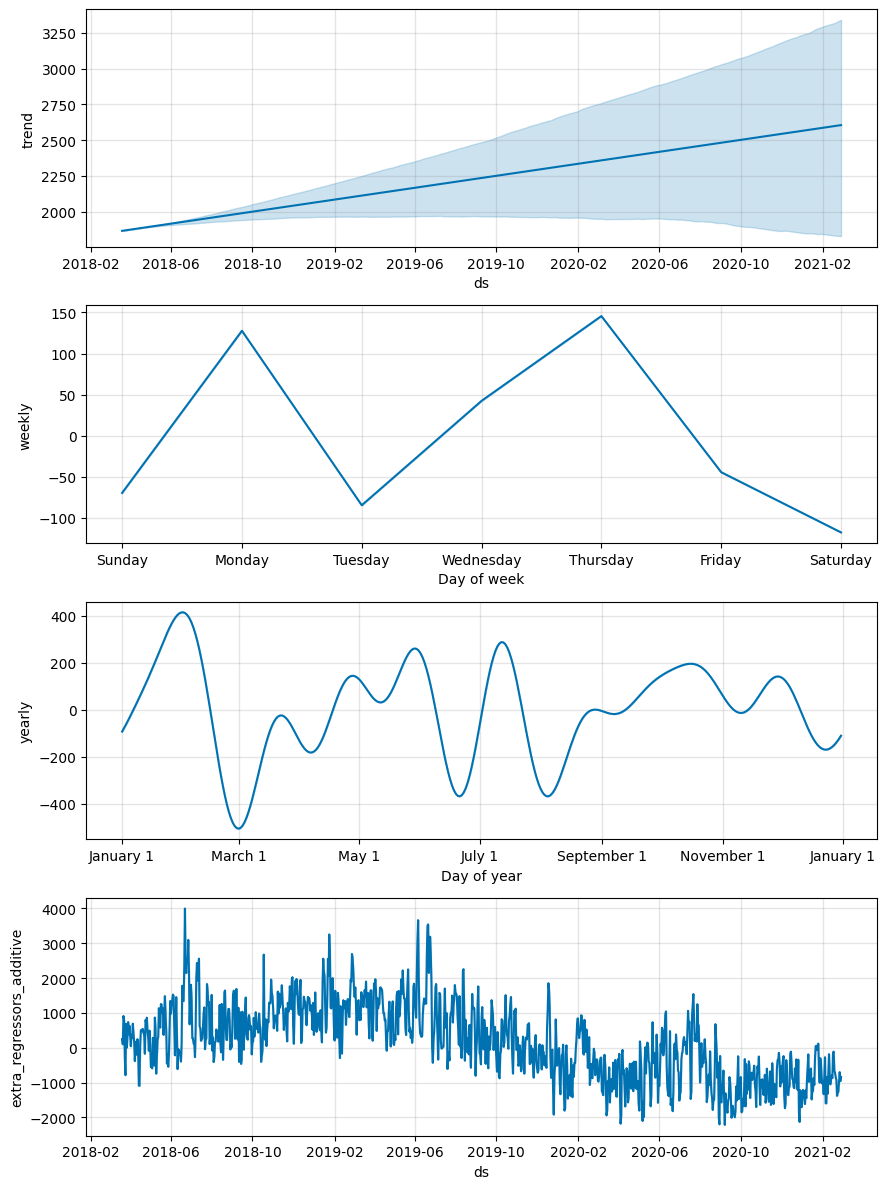

In [34]:
model_2.plot_components(pred_2)
plt.show()

In [35]:
train_3 = new_df.iloc[:2757,:]
test_3 = new_df.iloc[2757:,:]
train_3.shape , test_3.shape

((2757, 5), (1077, 5))

In [36]:
#Training a forecast model without 'Tmax'
model_3 = Prophet()
model_3.add_regressor('one')
model_3.add_regressor('three')

In [39]:
model_3.fit(train_3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiw9e705/36effggz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeiw9e705/nndb4zv4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67530', 'data', 'file=/tmp/tmpeiw9e705/36effggz.json', 'init=/tmp/tmpeiw9e705/nndb4zv4.json', 'output', 'file=/tmp/tmpeiw9e705/prophet_model0ejolenu/prophet_model-20230801210600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:06:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:06:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Question 20

In [40]:
pred_3 = model_3.predict(test_3)
mape(test_3['y'],pred_3['yhat'])

232.0

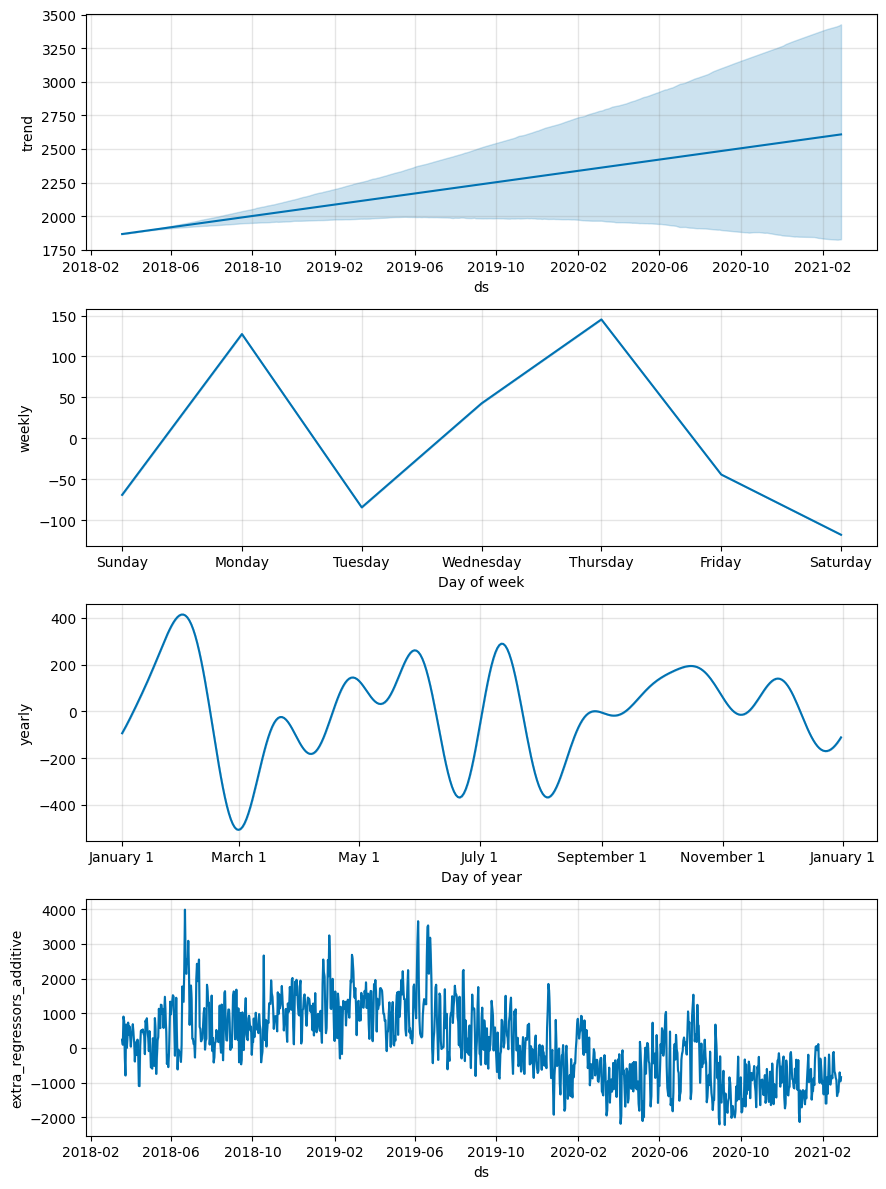

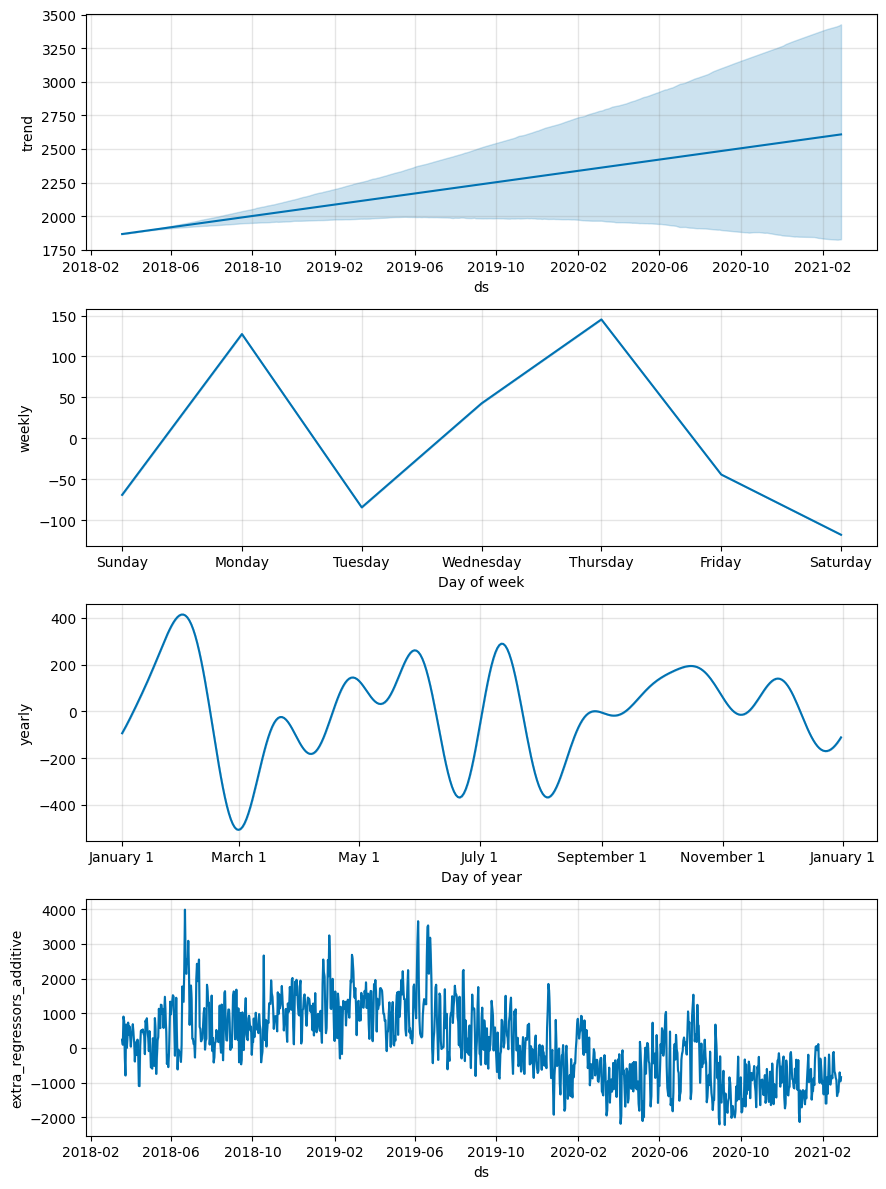

In [42]:
model_3.plot_components(pred_3)